# Kaggle -- Digit Recognizer 
## 1. 导入相应包(Import Packages)

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical 
import itertools
import zipfile  
np.random.seed(6)

## 2. 加载数据(Input Data)

In [41]:
def unzip_file(zip_filepath, dest_path):  
    with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:  
        zip_ref.extractall(dest_path)  

In [42]:
unzip_file("./data/train.csv.zip", "./data/train.csv")
unzip_file("./data/test.csv.zip", "./data/test.csv")

In [43]:
train = pd.read_csv("./data/train.csv/train.csv")
test = pd.read_csv("./data/test.csv/test.csv")

In [44]:
print("Size of training set:", train.shape)
print("Size of testing set:", test.shape)

Size of training set: (42000, 785)
Size of testing set: (28000, 784)


In [45]:
train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


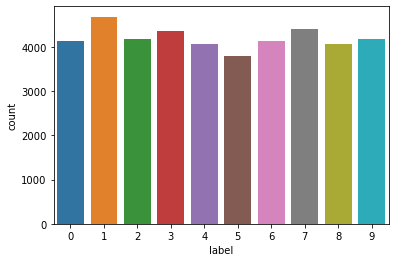

In [5]:
Y_train = train['label']
X_train = train.drop(labels='label', axis=1)
graph1 = sns.countplot(Y_train)

## 3. 数据预处理(Data Preprocessing)

### 3.1 缺失值处理(Null Check)

In [6]:
#检查是否有缺失值(Check if there is any null)
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [7]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

There are no nulls in both the training and test sets.

### 3.2 归一化处理(Normalization)

In [8]:
X_train = X_train / 255
test = test / 255

### 3.3 重塑图像(Reshape Images)

In [9]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

### 3.4 标签独热编码(One-hot transform for labels)

In [10]:
Y_train = to_categorical(Y_train, num_classes=10)
Y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

### 3.5 划分训练集和验证集(Divide training set and validation set)

In [11]:
X_train, X_vali, Y_train, Y_vali = train_test_split(X_train,Y_train,test_size=0.1,random_state=6) 

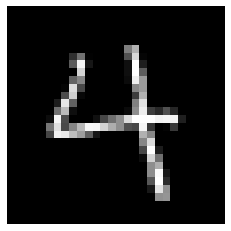

In [12]:
#visualized images
img_example = X_train[1][:, :, 0]  
plt.imshow(img_example, cmap='gray')   
plt.axis('off')  
plt.show()  

## 4. 卷积神经网络(CNN)

In [13]:
#CNN
model = Sequential() 

model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))  
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))  
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))


## 5. 设置优化器和回调函数(Optimizers and Callbacks)

In [14]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

c:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [15]:
LR_reduction = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, verbose=1, min_lr=0.00001)

## 6. 数据增强(Data Augmentation)

In [16]:
DataGen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                             zca_whitening=False,
                             rotation_range=20,
                             height_shift_range=0.1,
                             width_shift_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=False,
                             vertical_flip=False)

DataGen.fit(X_train)

## 7. 模型拟合(Model Fitting)

In [17]:
epochs = 30
batch_size = 86

history = model.fit_generator(DataGen.flow(X_train, Y_train, batch_size=batch_size), 
                              epochs=epochs, validation_data=(X_vali,Y_vali),
                    verbose=2, steps_per_epoch=X_train.shape[0] // batch_size, callbacks=[LR_reduction])

c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
439/439 - 13s - loss: 0.3864 - accuracy: 0.8741 - val_loss: 0.0544 - val_accuracy: 0.9833
Epoch 2/30
439/439 - 7s - loss: 0.1308 - accuracy: 0.9591 - val_loss: 0.0362 - val_accuracy: 0.9883
Epoch 3/30
439/439 - 7s - loss: 0.1021 - accuracy: 0.9686 - val_loss: 0.0322 - val_accuracy: 0.9902
Epoch 4/30
439/439 - 7s - loss: 0.0877 - accuracy: 0.9737 - val_loss: 0.0389 - val_accuracy: 0.9874
Epoch 5/30
439/439 - 7s - loss: 0.0794 - accuracy: 0.9765 - val_loss: 0.0349 - val_accuracy: 0.9883
Epoch 6/30
439/439 - 8s - loss: 0.0752 - accuracy: 0.9771 - val_loss: 0.0220 - val_accuracy: 0.9926
Epoch 7/30
439/439 - 8s - loss: 0.0727 - accuracy: 0.9787 - val_loss: 0.0283 - val_accuracy: 0.9919
Epoch 8/30
439/439 - 8s - loss: 0.0699 - accuracy: 0.9783 - val_loss: 0.0288 - val_accuracy: 0.9914
Epoch 9/30
439/439 - 8s - loss: 0.0674 - accuracy: 0.9804 - val_loss: 0.0270 - val_accuracy: 0.9917

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 10/30
439/43

## 7. 模型评估(Model Evaluation)

### 7.1 训练和验证曲线(Training and Validation Curves)

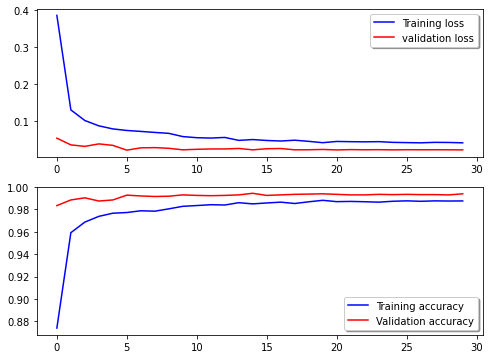

In [18]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(8,6))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss", axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)
                      
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

由图可以看出，Training accuracy始终低于Validation accuracy，证明模型没有过拟合。

According to the figure, Training accuracy is always lower than Validation accuracy, which means the model does not overfit.

### 7.2 混淆矩阵(Confusion Matrix)

In [19]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm=cm.astype(float)/cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks =np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt ='.2f' if normalize else 'd'
    thresh=cm.max() / 2.
    for i, j in itertools.product (range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,format(cm[i, j], fmt), horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

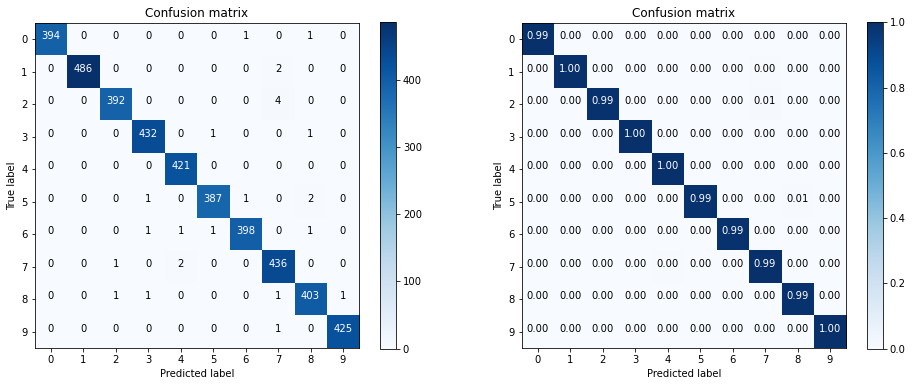

In [20]:
Y_pred = model.predict(X_vali)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_vali, axis=1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

plt.figure(figsize=(16,6))
plt.subplot(121)
plot_confusion_matrix(confusion_mtx, classes=range(10))
plt.subplot(122)
plot_confusion_matrix(confusion_mtx, classes=range(10), normalize=True)

可看到有一些错误预测结果。我们需要调查一下错误。

We can see there are some wrong predictions. We need to investigate these errors.

In [21]:
errors = (Y_pred_classes - Y_true != 0)
Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
X_vali_errors = X_vali[errors]
Y_true_errors = Y_true[errors]


In [22]:
Y_pred_errors_prob = np.max(Y_pred_errors, axis=1)

In [34]:
true_prob = [0.0]*len(Y_true_errors)
for i in range(Y_pred_errors.shape[0]):
    true_prob[i] = Y_pred_errors[i][Y_true_errors[i]]
true_prob = np.array(true_prob)
print(true_prob)

[2.5900480e-01 4.9574830e-04 2.9223543e-01 4.0262178e-01 2.4880488e-01
 4.1695511e-01 3.1063999e-05 1.4347437e-01 4.9009278e-02 3.3289030e-02
 1.7766330e-02 5.1348459e-02 1.6553892e-04 8.4618844e-02 1.8172869e-01
 2.2840527e-01 4.4929257e-01 4.0803898e-02 3.5195187e-01 3.6169733e-03
 2.8905049e-01 7.5490559e-03 9.9577501e-02 1.5857498e-01 7.6043489e-03
 9.1773935e-02]


In [35]:
def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    n = 0
    nrows =2
    ncols =3
    fig, ax = plt.subplots(nrows, ncols,figsize=(12,8), sharex=True, sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row, col].imshow((img_errors[error]).reshape((28, 28)), cmap='gray')
            ax[row, col].set_title("Predicted label : {}\nTrue label : {}".format(pred_errors[error], obs_errors[error]))
            n += 1

Number of errors:26
The probability difference between predicted label and true label:[0.99958205 0.9989753  0.99276596 0.9216429  0.89422494 0.8917518
 0.8082568  0.8008446  0.78017086 0.74593633 0.71296966 0.67718923
 0.6155322  0.5678672  0.54075307 0.48199037 0.47301722 0.41552216
 0.40352294 0.399581   0.37773582 0.3744749  0.29485628 0.19404921
 0.11358303 0.04275274] 


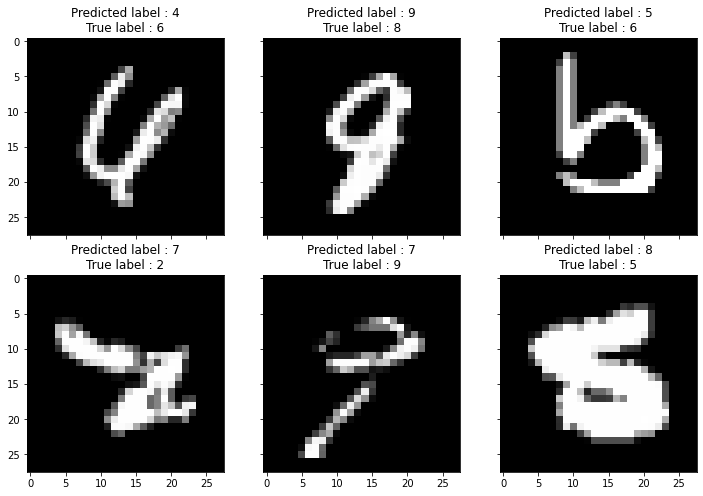

In [36]:
difference = Y_pred_errors_prob - true_prob
sorted_difference = np.argsort(-difference)

most_error = sorted_difference[:6]
print('Number of errors:{}\nThe probability difference between predicted label and true label:{} '.format(len(Y_pred_errors),
                                                                                             difference[sorted_difference]))
display_errors(most_error, X_vali_errors, Y_pred_classes_errors, Y_true_errors)

As the figure shown above, these mistakes are not surprising. Among them even normal human beings can't recognize accurately. So these errors are acceptable. 

## 8. 预测和提交结果(Test and Submit the Results)

In [37]:
results = model.predict(test)
results = np.argmax(results, axis=1)
results = pd.Series(results, name='Label')



In [38]:
results = pd.DataFrame(results)
results = results.reset_index(drop=False) 
results.rename(columns={'index': 'ImageID'}, inplace=True)  
results['ImageID'] = results['ImageID'] + 1


In [39]:
results.to_csv("cnn_mnist.csv",index=False)

## Some Notes

#### Q1：过程梳理，该模型或分析过程是否能拓展到其他问题的解决？
step1：相关包导入和数据导入  
step2: 针对数据类型，进行预处理（缺失值处理，归一化等）  
step3: 划分训练集和验证集（两个集的比例）  
step4: 设计神经网络模型（如何设计，参数设置等）  
step5: 设置优化器和回调函数（选用那种，参数设置等）  
step6: 数据增强，防止过拟合  
step7: 模型拟合并评估（画图——可视化，更直观）  




#### Q2: 如何得出该架构的CNN？关于各层的排列和选用（卷积层，池化层，全连接层以及激活函数等的选用--效果最好？）
1. 理解任务需求：  
首先，您需要深入了解任务的具体需求，例如图像分类、目标检测、语义分割等。  
分析输入数据的特性，如图像的大小、颜色通道数、分辨率等。  
确定任务的输出需求，如分类的类别数、目标检测的定位精度等。

2. 选择合适的基准模型：
根据任务需求，选择一个或多个现有的基准模型作为起点。  
考虑使用经典的CNN架构（如LeNet、AlexNet、VGG等）或更现代的架构（如ResNet、Inception、EfficientNet等）。

3. 调整网络深度：
增加网络深度（即添加更多层）通常可以提高模型的表示能力，但也可能导致过拟合和计算成本增加。  
通过逐渐增加或减少层数，观察模型性能的变化，找到最佳的网络深度。

4. 调整卷积核大小和数量：
卷积核的大小和数量影响模型的感受野和特征提取能力。  
尝试使用不同大小的卷积核（如3x3、5x5等）和不同的卷积核数量，观察模型性能的变化。

5. 优化池化操作：
池化操作有助于减少特征图的尺寸和计算量，同时保留重要信息。    
尝试使用不同类型的池化操作（如最大池化、平均池化等），并调整池化窗口的大小和步长。

6. 使用正则化和优化技术：
引入正则化技术（如Dropout、Batch Normalization等）以减少过拟合。  
选择合适的优化算法（如SGD、Adam等）和学习率调整策略。

7. 进行超参数调优：
超参数（如学习率、批次大小、迭代次数等）对模型性能有很大影响。  
使用网格搜索、随机搜索或贝叶斯优化等方法进行超参数调优。

8. 实验验证与性能评估：
使用验证集对模型性能进行实时评估，以便在训练过程中调整架构和参数。  
使用测试集对最终模型进行性能评估，确保模型具有良好的泛化能力。

9. 参考现有研究：
查阅相关领域的最新研究，了解其他研究者是如何解决类似任务的。  
借鉴他们的网络设计思路和技巧，作为自己设计的参考。


该任务中沿用了经典的LeNet架构。中间穿插dropout避免过拟合。使用Relu作为激活函数，因其稀疏性、计算效率、缓解梯度消失问题以及适应性。
  
filters数量可能因任务、数据集和模型架构的不同而有所变化，首先，考虑你的任务复杂性。对于更复杂的任务，如图像分类或目标检测，可能需要更多的滤波器来捕获丰富的特征。而对于相对简单的任务，可能较少的滤波器就足够了。  

数据集的大小也是一个重要因素。如果你有一个非常大的数据集，那么模型有更多的机会从数据中学习到有用的特征，因此可以增加滤波器的数量。相反，如果数据集较小，过多的滤波器可能会导致过拟合。

滤波器的数量也会直接影响模型的计算复杂性和训练时间。更多的滤波器意味着更多的参数需要优化，这可能需要更多的计算资源。因此，在确定滤波器数量时，也要考虑你的计算资源和时间限制。  

可以使用超参数搜索方法（如网格搜索、随机搜索或贝叶斯优化）来自动寻找最佳的滤波器数量。这些方法可以帮助你在一定的范围内自动调整滤波器的数量，并找到使模型性能最优的参数。

池化层的参数同理，通过尝试不同的值并观察模型的表现来进行调整。


Flatten层用于将多维的输入一维化，即将输入“压平”。  

第一个Dense层（带有ReLU激活函数）：  
这是一个全连接层，它有1000个神经元（或称为单元）。全连接层中的每个神经元都与前一层的所有神经元连接。这里使用的激活函数是ReLU（Rectified Linear Unit），它如之前所述，能够增加模型的非线性，同时有助于缓解梯度消失问题。这一层的主要作用是进一步从输入数据中提取和组合特征，以便后续的层可以更好地进行分类。  

第二个Dense层（带有Softmax激活函数）：  
这是输出层，它有10个神经元，对应于10个不同的手写数字类别（0到9）。这里使用的激活函数是Softmax，它将每个神经元的输出转换为一个概率分布，使得所有神经元的输出概率之和为1。Softmax常用于多分类问题中。这样，模型可以为每个输入图像预测一个属于某个数字类别的概率。在训练过程中，模型会学习如何调整权重，以便为正确的数字类别输出较高的概率。

#### Q3：关于一些参数，如何得出最佳/较好的参数？其中包括：拟合的batch size, epoch, 回调的factor, patience, verbose, min_lr，优化器的lr, rho, epsilon, decay，网络的filters，padding，kernel size，pool size，全连接层的展开层数等。

对于学习率，通常在0.1，0.01，0.001......等中尝试调整，过高难收敛到最佳，过低则需要更长的训练时间。 
 
batch size设置的不能太大也不能太小：  
1）batch数太小，而类别又比较多的时候，真的可能会导致loss函数震荡而不收敛，尤其是在你的网络比较复杂的时候。  
2）随着batch size增大，处理相同的数据量的速度越快。  
3）随着batch size增大，达到相同精度所需要的epoch数量越来越多。  
4）由于上述两种因素的矛盾， Batch_Size 增大到某个时候，达到时间上的最优。  
5）由于最终收敛精度会陷入不同的局部极值，因此 Batch_Size 增大到某些时候，达到最终收敛精度上的最优。  
6）过大的batch size的结果是网络很容易收敛到一些不好的局部最优点。同样太小的batch也存在一些问题，比如训练速度很慢，训练不容易收敛等。  
7）具体的batch size的选取和训练集的样本数目相关。  


全连接层的神经元个数是一个迭代和调整的过程。您可能需要根据模型的性能、训练时间、计算资源等多个因素进行权衡和调整。同时，与其他超参数（如学习率、批处理大小等）一样，神经元数量的选择也是任务特定和数据集特定的。  

其他参数同理，根据模型的性能、训练时间、计算资源等多个因素进行权衡和调整，通过不断实验得出较佳的目标参数值

